In [22]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import sys
from os.path import expanduser
home_dir = expanduser("~")
module_path = home_dir + '/code/modules/'
sys.path.append(module_path)
import numpy as np
import random
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 1
%aimport distance_metrics
from distance_metrics import minkowski_distance

np.random.seed(999)
random.seed(999)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Relative differences between different p-values

<function matplotlib.pyplot.show(*args, **kw)>

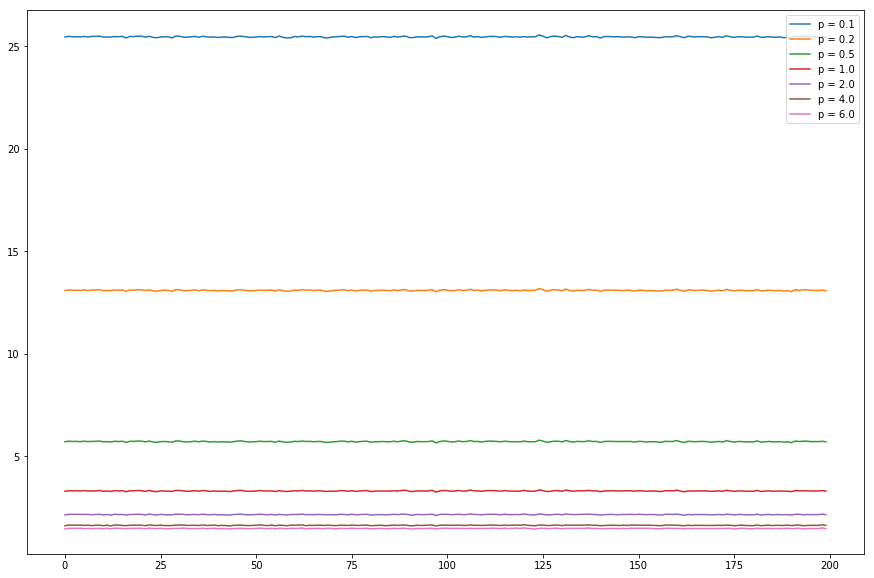

In [31]:
p_vals = [.1, .2, .5, 1, 2, 4, 6]
nr_params = 300
nr_distances = 200
distances = np.zeros((nr_distances, len(p_vals)))
for i_dist in range(nr_distances):
    point1 = np.random.uniform(low=-10, high=10, size=nr_params)
    point2 = np.random.uniform(low=-10, high=10, size=nr_params)
    for ip, p in enumerate(p_vals):
        d = minkowski_distance([point1,point2],p=p)
        distances[i_dist, ip] = np.log10(d)
        
fig = plt.figure(figsize=(15,10))
lines = []
for ip, p in enumerate(p_vals):
    line, = plt.plot(distances[:, ip], label='p = {:.1f}'.format(p))
    lines.append(line)
labels = [line.get_label() for line in lines]
plt.legend(lines, labels)
plt.show

#### One distance, different p-value distances

In [38]:
p_vals = [.1, .2, .5, 1, 2, 3, 4, 5, 6, 7]
n_dims = 300
a = np.random.rand(n_dims)
b = np.random.rand(n_dims)
c = np.random.rand(n_dims)
for p in p_vals:
    d1 = minkowski_distance([a,b],p=p)
    d2 = minkowski_distance([a,c],p=p)
    print('p = {:.1f}     {:.5f}'.format(p, d1/d2))

p = 0.1     1.03073
p = 0.2     1.02671
p = 0.5     1.01564
p = 1.0     1.00240
p = 2.0     0.99296
p = 3.0     0.99432
p = 4.0     0.99845
p = 5.0     1.00263
p = 6.0     1.00619
p = 7.0     1.00907
